# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; b. focus on sex

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

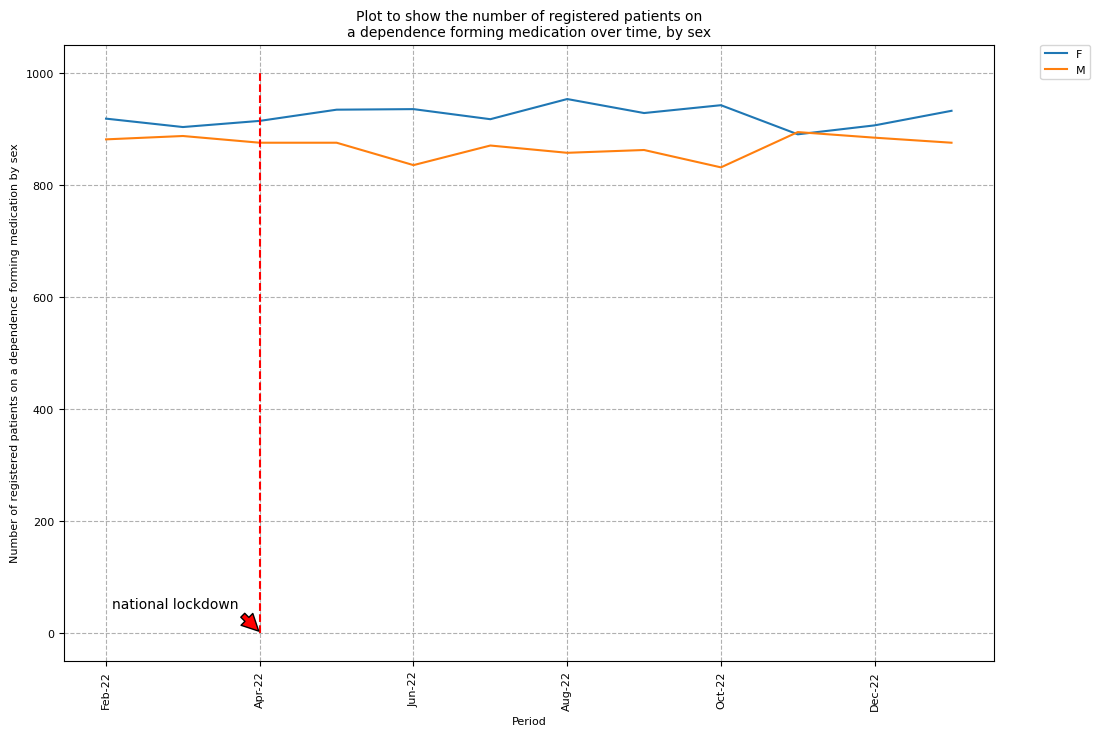

In [3]:
data_measure_dfm_medications_sex_rate = pd.read_csv("../output/measure_dfm_medications_by_sex_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_sex_rate = data_measure_dfm_medications_sex_rate.loc[data_measure_dfm_medications_sex_rate["sex"].isin(["F", "M"]), :]
df_measure_dfm_medications_sex_rate = pd.DataFrame.pivot(data_measure_dfm_medications_sex_rate, index='date', columns='sex', values='research_population')
df_measure_dfm_medications_sex_rate.index = pd.to_datetime(df_measure_dfm_medications_sex_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_sex_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      F    I    M    U
------  ---  ---  ---  ---
Feb-22  944   99  868   89
date      F    I    M    U
------  ---  ---  ---  ---
Jan-23  941   90  867  102


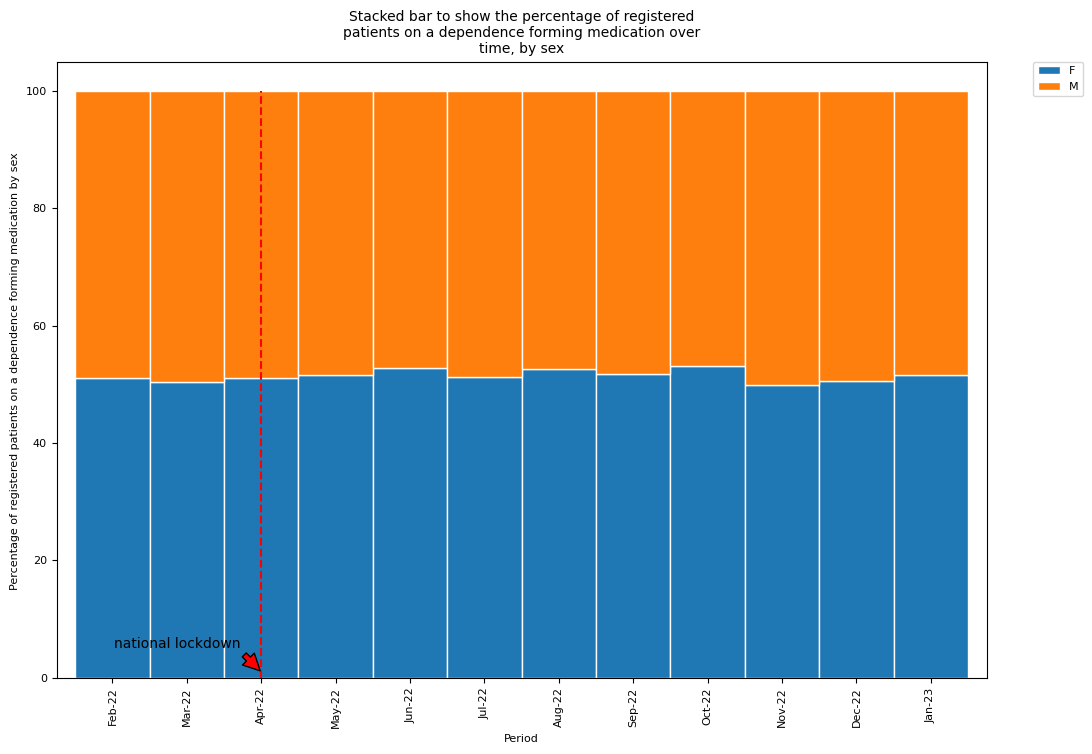

In [4]:
df_sex_stacked = pd.DataFrame(df_measure_dfm_medications_sex_rate)
df_sex_stacked.head()
totsm = df_sex_stacked.sum(axis=1)
persm = df_sex_stacked.div(totsm, axis=0).mul(100).round(2)
ax = persm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by sex ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(persm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(persm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       F     I     M     U
------  ----  ----  ----  ----
Feb-22  47.2  4.95  43.4  4.45
date        F    I      M    U
------  -----  ---  -----  ---
Jan-23  47.05  4.5  43.35  5.1


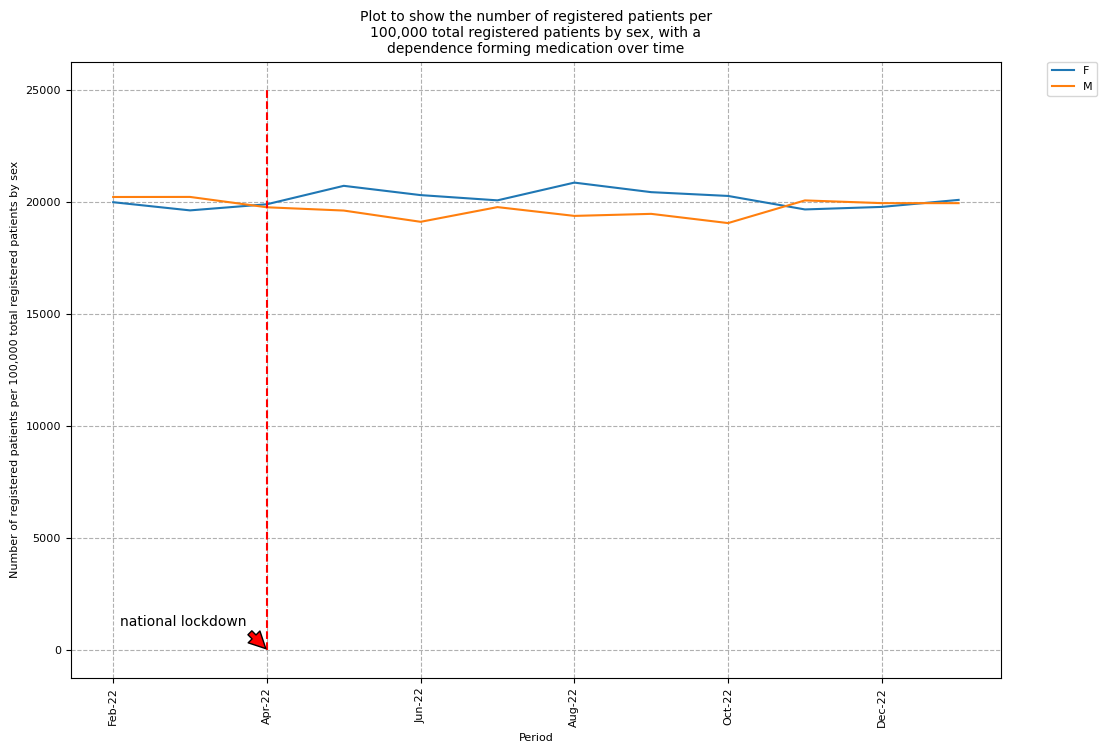

In [5]:
df_temp = pd.DataFrame(data_measure_dfm_medications_sex_rate)
df_sex_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_sex_research_population = pd.DataFrame.pivot(df_sex_research_population, index='date', columns='sex', values='weighted_research_population')
df_sex_research_population.index = pd.to_datetime(df_sex_research_population.index).strftime('%b-%y')
ax = df_sex_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by sex, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df_sex_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_sex_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          F        I        M      U
------  -------  -------  -------  -----
Feb-22  20059.5  21019.1  19944.9  18896
date          F        I      M        U
------  -------  -------  -----  -------
Jan-23  20267.1  18789.1  19899  19577.7


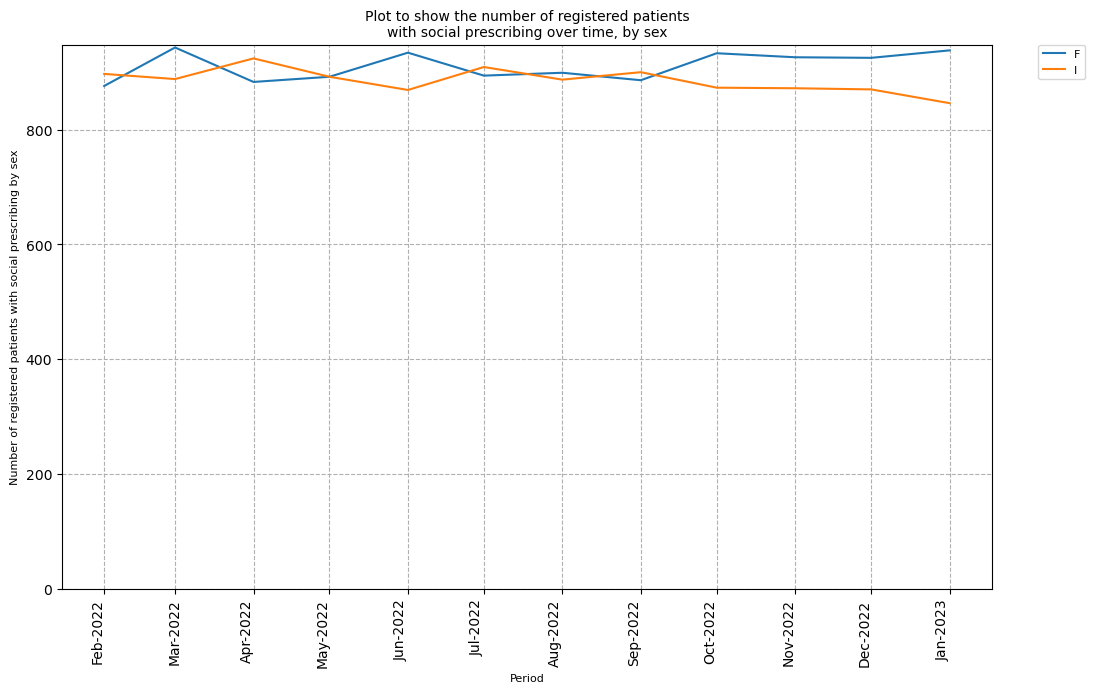

In [7]:
data_measure_social_prescribing_sex_rate = pd.read_csv("../output/measure_compare_medications_by_sex_socialrx_v_consultation_rate.csv", usecols=["date", "sex", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_sex_rate = data_measure_social_prescribing_sex_rate.loc[data_measure_social_prescribing_sex_rate["sex"].isin(["F", "M"]), :]
data_measure_social_prescribing_sex_rate = data_measure_social_prescribing_sex_rate.loc[data_measure_social_prescribing_sex_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_sex_rate) 
df2 = df.groupby(['date', 'sex']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by sex', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["F", "I", "M", "U"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   F    I    M    U
-------------------  ---  ---  ---  ---
2022-02-01 00:00:00  937   90  879   94
date                   F    I    M    U
-------------------  ---  ---  ---  ---
2023-01-01 00:00:00  913   98  877  112


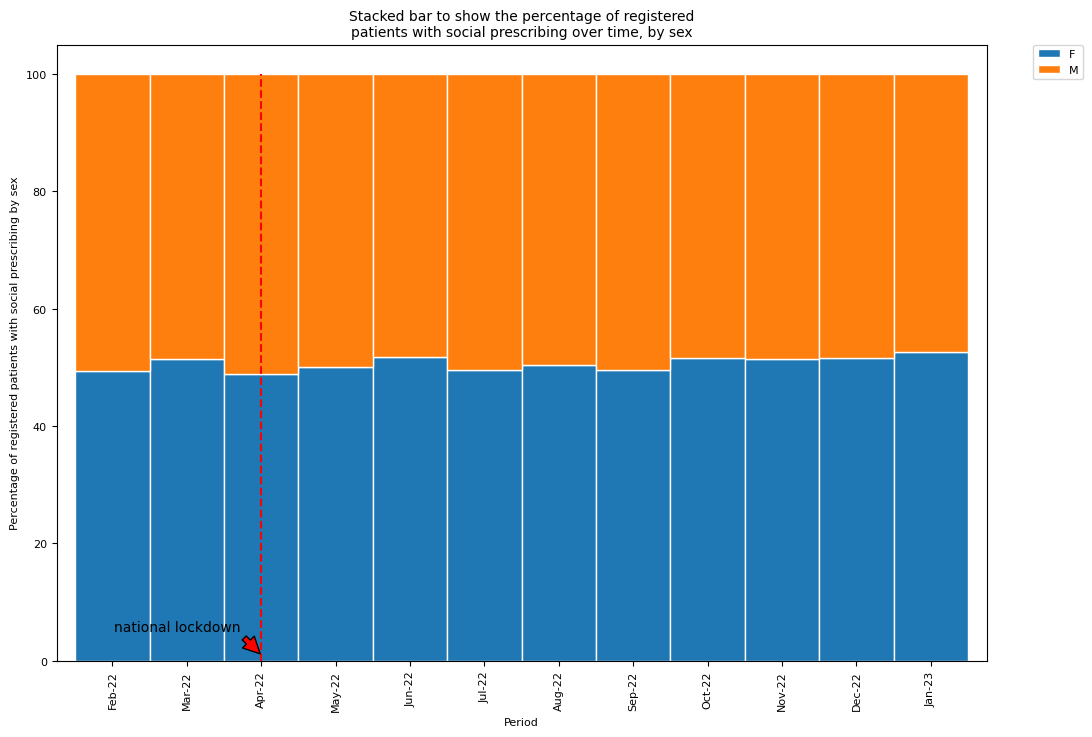

In [8]:
df_sex_social_stacked = pd.DataFrame(df2)
df_sex_social_stacked.head()
df_sex_social_stacked.index = pd.to_datetime(df_sex_social_stacked.index).strftime('%b-%y')
totss = df_sex_social_stacked.sum(axis=1)
perss = df_sex_social_stacked.div(totss, axis=0).mul(100).round(2)
ax = perss.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_sex_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(perss.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perss.iloc[-1:], headers='keys', tablefmt = 'simple'))

date        F    I      M    U
------  -----  ---  -----  ---
Feb-22  46.85  4.5  43.95  4.7
date        F    I      M    U
------  -----  ---  -----  ---
Jan-23  45.65  4.9  43.85  5.6


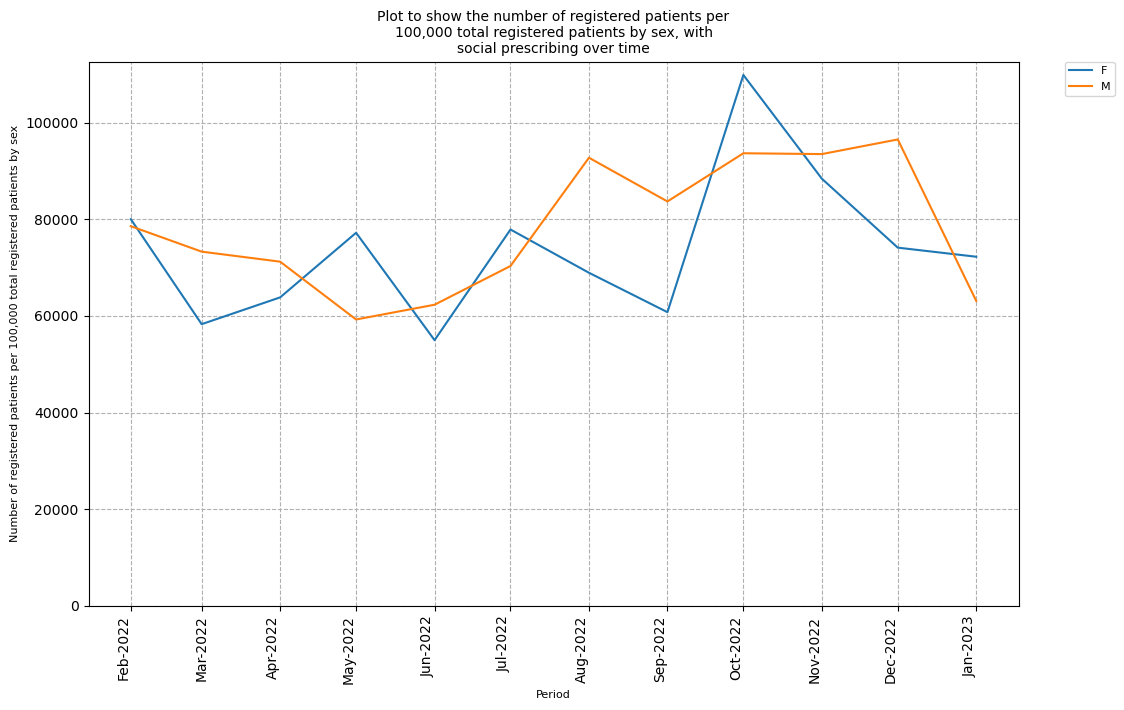

In [10]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'sex']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by sex', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by sex, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["F","M"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_sex_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                       F        I        M        U
-------------------  -------  -------  -------  -------
2022-02-01 00:00:00  69525.4  46022.7  80904.6  31419.5
date                      F      I        M        U
-------------------  ------  -----  -------  -------
2023-01-01 00:00:00  114831  70628  84344.4  40731.7


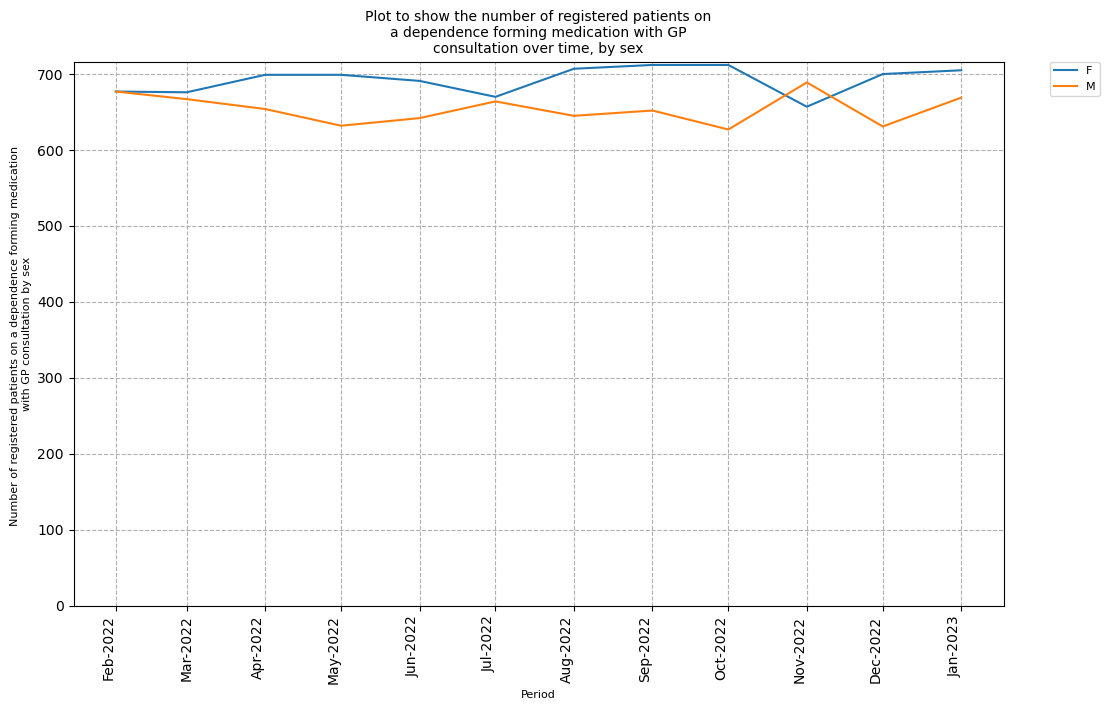

In [12]:
data_measure_consultation_sex_rate = pd.read_csv("../output/measure_compare_medications_by_sex_socialrx_v_consultation_rate.csv", usecols=["date", "sex", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_sex_rate = data_measure_consultation_sex_rate.loc[data_measure_consultation_sex_rate["sex"].isin(["F", "M"]), :]
data_measure_consultation_sex_rate = data_measure_consultation_sex_rate.loc[data_measure_consultation_sex_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_sex_rate)
df2 = df.groupby(['date', 'sex']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by sex', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["F", "M"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   F    I    M    U
-------------------  ---  ---  ---  ---
2022-02-01 00:00:00  708   77  640   69
date                   F    I    M    U
-------------------  ---  ---  ---  ---
2023-01-01 00:00:00  717   75  668   79


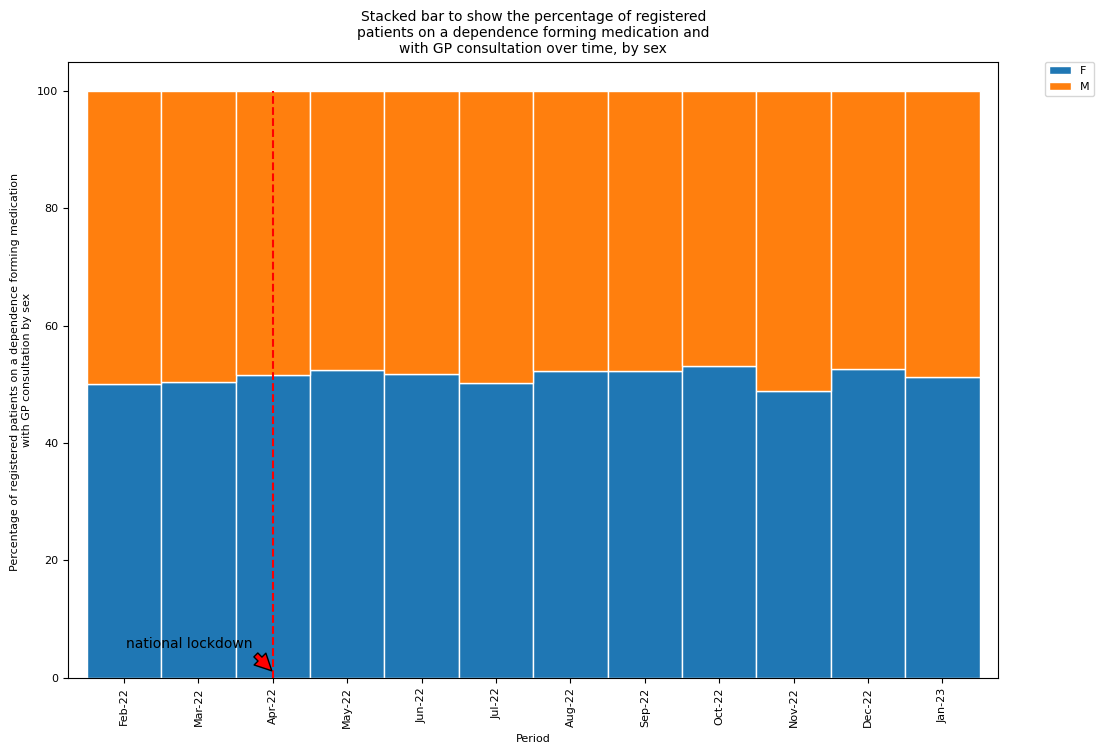

In [13]:
df_sex_consult_stacked = pd.DataFrame(df2)
df_sex_consult_stacked.head()
df_sex_consult_stacked.index = pd.to_datetime(df_sex_consult_stacked.index).strftime('%b-%y')
totsc = df_sex_consult_stacked.sum(axis=1)
persc = df_sex_consult_stacked.div(totsc, axis=0).mul(100).round(2)
ax = persc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_sex_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(persc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(persc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date        F     I      M     U
------  -----  ----  -----  ----
Feb-22  47.39  5.15  42.84  4.62
date        F     I     M     U
------  -----  ----  ----  ----
Jan-23  46.59  4.87  43.4  5.13


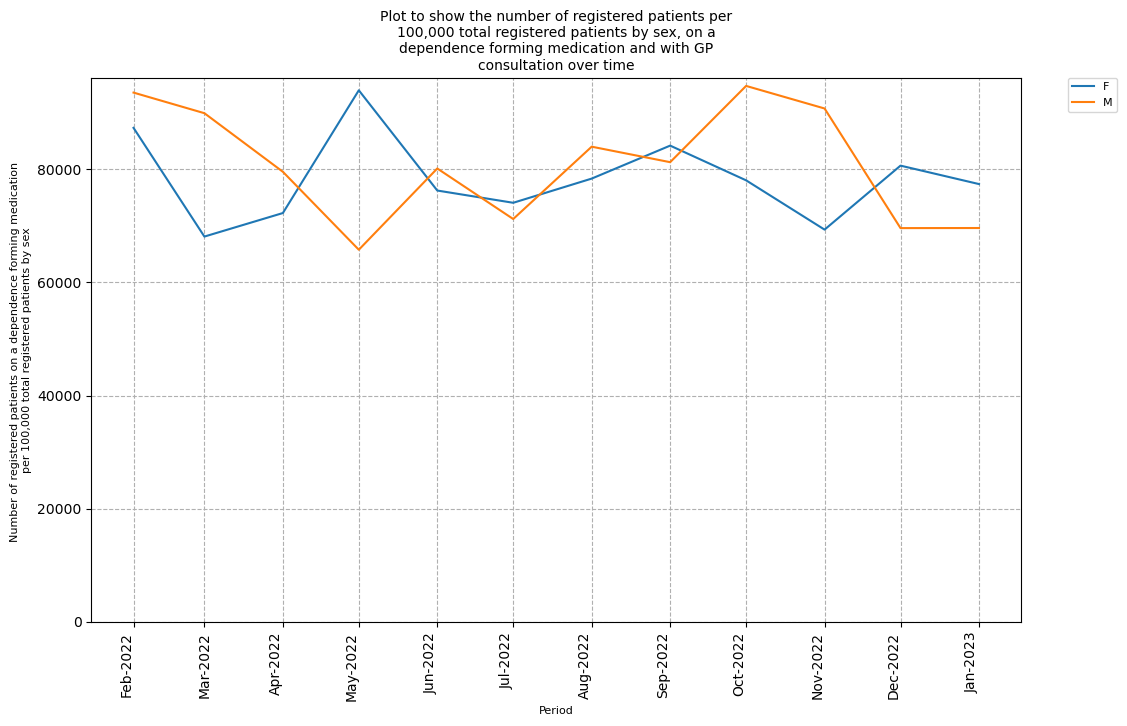

In [14]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'sex']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by sex', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by sex, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["F", "M"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                     F        I        M        U
-------------------  -----  -------  -------  -------
2022-02-01 00:00:00  78265  63987.6  80127.3  48664.8
date                       F        I      M        U
-------------------  -------  -------  -----  -------
2023-01-01 00:00:00  95934.4  39463.4  89566  63383.3
